Imports


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.decomposition import PCA

Downloads / Returns

In [24]:
tickers: list[str] = ["AAPL","MSFT","NVDA","GOOGL","AMZN","META",
                      "JPM","BAC","XOM","CVX","JNJ","PG","PEP","KO","COST"]
df = yf.download(
    tickers,
    start="2023-01-01",
    end="2025-01-01",
    auto_adjust=True,      
    group_by="ticker",
    progress=False,
    threads=True,
)

if isinstance(df.columns, pd.MultiIndex):
    level0 = df.columns.get_level_values(0)
    avail = [t for t in tickers if t in level0]
    data = df.loc[:, (avail, "Close")]
    data.columns = data.columns.get_level_values(0)  
else:
    data = df[["Close"]]
    data.columns = tickers[:1]

data = data.dropna(how="all", axis=1)

returns = np.log(data / data.shift(1)).dropna()
corr = returns.corr()

CPA

In [25]:
pca = PCA()
pca.fit(corr)

eigenvalues = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained_ratio)
eigenvectors = pca.components_

Plots

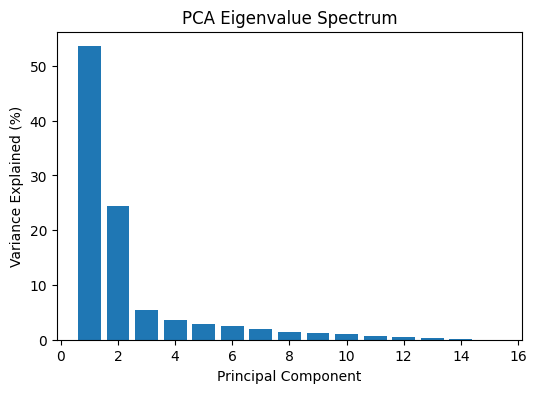

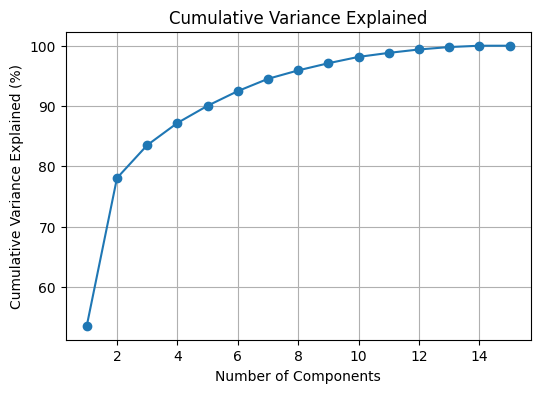

In [26]:
plt.figure(figsize=(6,4))
plt.bar(range(1,len(eigenvalues)+1), explained_ratio*100)
plt.ylabel("Variance Explained (%)")
plt.xlabel("Principal Component")
plt.title("PCA Eigenvalue Spectrum")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(1,len(eigenvalues)+1), cum_explained*100, marker="o")
plt.ylabel("Cumulative Variance Explained (%)")
plt.xlabel("Number of Components")
plt.title("Cumulative Variance Explained")
plt.grid(True)
plt.show()

Inspect first Eigenvektor

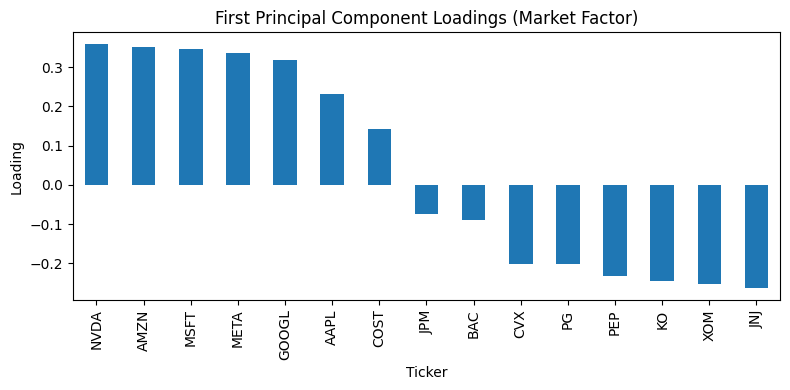

In [27]:
first_ev = pd.Series(eigenvectors[0], index=corr.columns)
first_ev.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))
plt.title("First Principal Component Loadings (Market Factor)")
plt.ylabel("Loading")
plt.tight_layout()
plt.show()

Reconstruction of correlation matrix

In [28]:
k = 3
reconstructed = np.zeros_like(corr)
for i in range(k):
    v = eigenvectors[i].reshape(-1,1)
    reconstructed += eigenvalues[i] * v @ v.T

reconstructed = pd.DataFrame(reconstructed, index=corr.index, columns=corr.columns)

Outputs

In [29]:
print("Top 5 Variance Explained Ratios:")
print(pd.Series(explained_ratio[:5], index=[f"PC{i+1}" for i in range(5)]))
print("\nCumulative variance explained by first 3 PCs:",
      round(cum_explained[2]*100,2), "%")

Top 5 Variance Explained Ratios:
PC1    0.535668
PC2    0.244889
PC3    0.054524
PC4    0.036808
PC5    0.028534
dtype: float64

Cumulative variance explained by first 3 PCs: 83.51 %
